In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,priceUSD
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


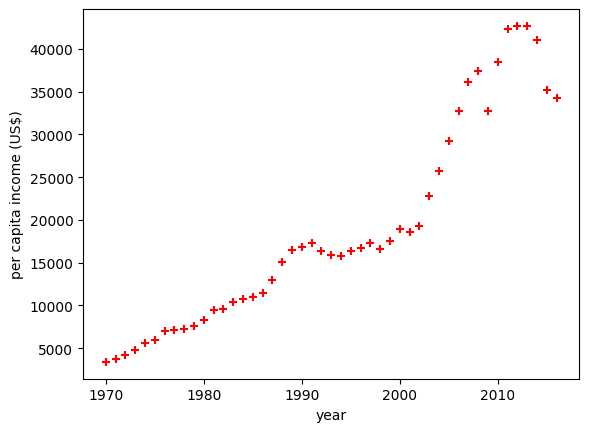

In [12]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df.year, df.priceUSD, color='red', marker='+')

In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df.priceUSD)

LinearRegression()

In [25]:
reg.predict([[2020]])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [21]:
reg.coef_

array([828.46507522])

In [22]:
reg.intercept_

-1632210.7578554575

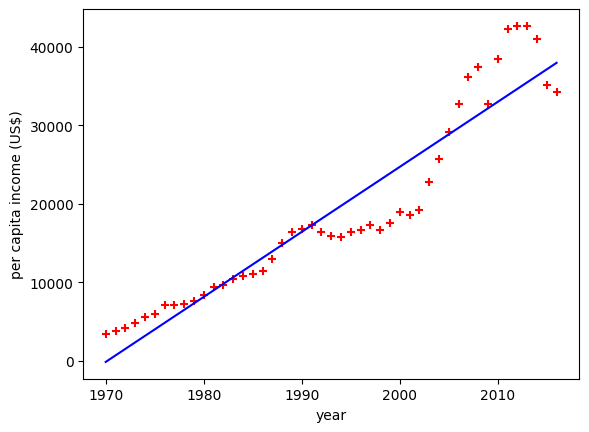

In [26]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df.year, df.priceUSD, color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [16]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [17]:
# Fill NaN values with median value of a column
median_bedrooms = int(df.bedrooms.median())
print(median_bedrooms)

# fillna does not modify the df inplace
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)
print(df.head())

4
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


In [18]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)	

LinearRegression()

In [21]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [22]:
reg.intercept_

221323.00186540443

In [24]:
reg.predict([[3000, 3, 40]])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [25]:
reg.predict([[2500, 4, 5]])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [178]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [179]:
from word2number import w2n

# Fill NaN experience values
df['experience'] = df['experience'].fillna("zero")

# Convert word experience to numbers
df.experience = df.experience.apply(w2n.word_to_num)
print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000


In [180]:
from sklearn.impute import SimpleImputer

# Use SimpleImputer to fill NaN values with the median
imputer = SimpleImputer(strategy='median')
df['test_score(out of 10)'] = imputer.fit_transform(df[['test_score(out of 10)']])

print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    8.0                           7      72000
7          11                    7.0                           8      80000


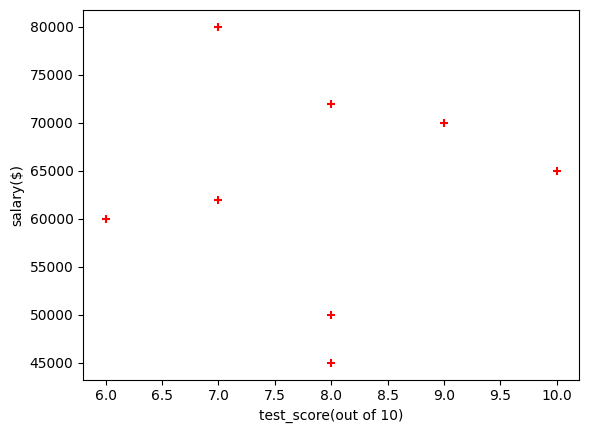

In [181]:
%matplotlib inline
plt.xlabel('test_score(out of 10)')
plt.ylabel('salary($)')
plt.scatter(df["test_score(out of 10)"], df["salary($)"], color='red', marker='+')

In [186]:
feature_names = ["experience", "test_score(out of 10)", "interview_score(out of 10)"]
reg.fit(df[feature_names], df["salary($)"])

LinearRegression()

In [187]:
reg.predict([[2, 9, 6]])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [188]:
reg.predict([[12, 10, 10]])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\jmfig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


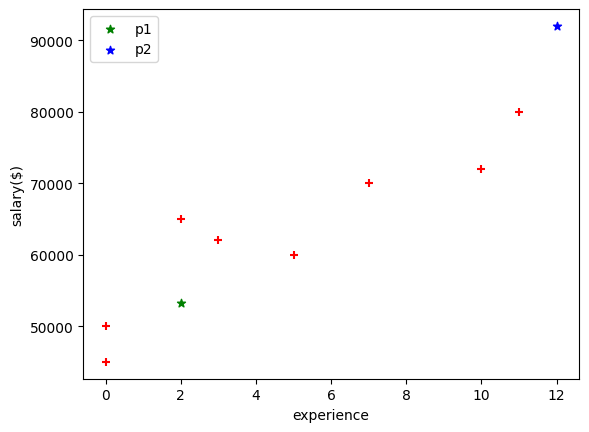

In [189]:
%matplotlib inline

p1 = [[2, 9, 6]]
p2 = [[12, 10, 10]]

plt.xlabel('experience')
plt.ylabel('salary($)')
plt.scatter(df["experience"], df["salary($)"], color='red', marker='+')
plt.scatter(p1[0][0], reg.predict(p1), color='green', marker='*', label='p1')
plt.scatter(p2[0][0], reg.predict(p2), color='blue', marker='*', label='p2')
plt.legend()
plt.show()